In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("Data_Negara_HELP(2).csv")

#Understanding Data

##Menampilkan contoh data, ukuran data, dan statistik data

In [3]:
# 5 data teratas
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Ukuran data
df.shape

(167, 10)

In [5]:
# Statistik Data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#Exploratory Data Analysis


##Cek Missing Value


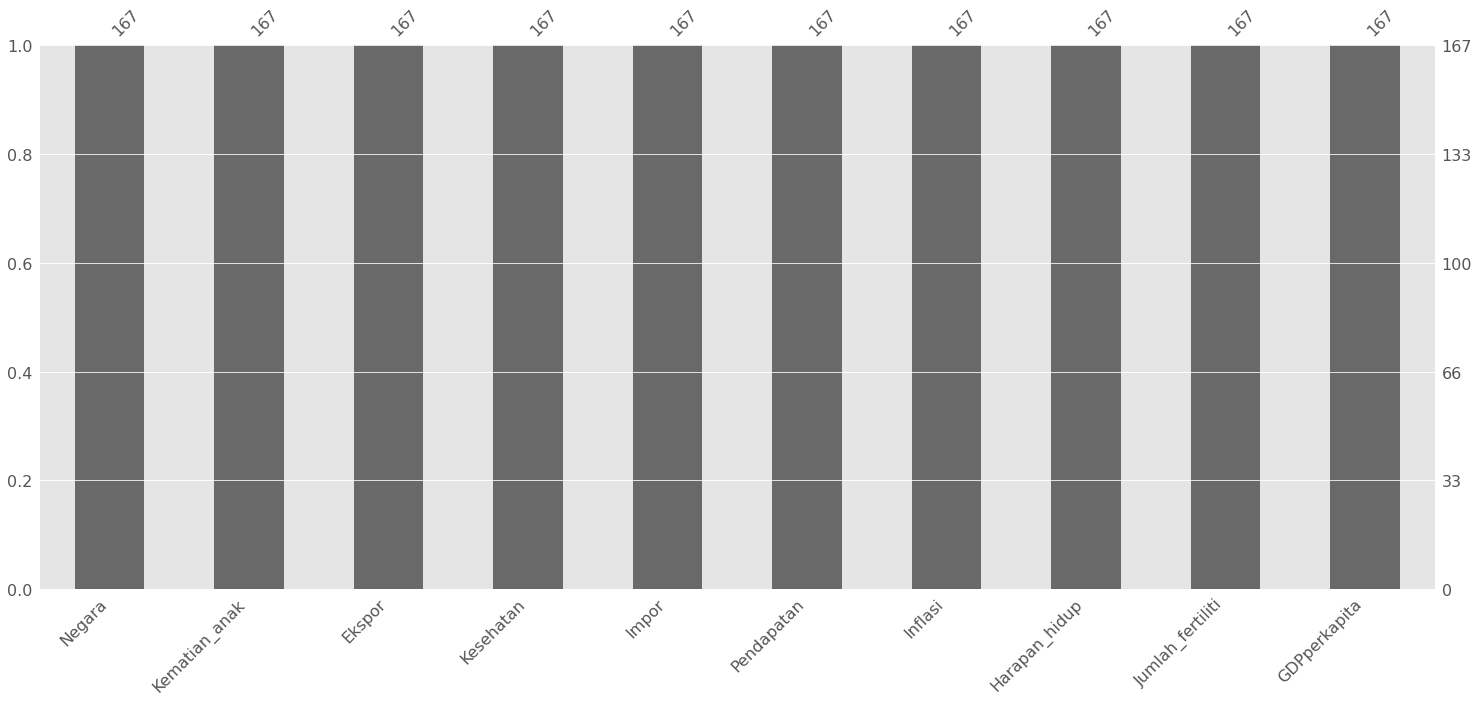

In [6]:
import missingno as msno
msno.bar(df)

###Cek Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

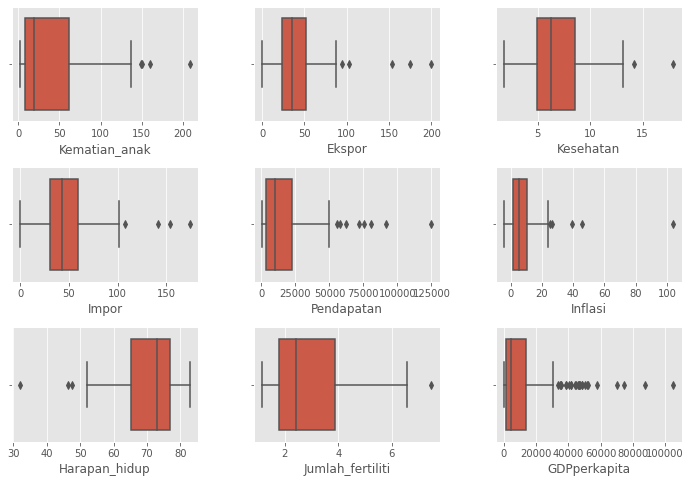

In [7]:
# boxplot untuk melihat berapa banyak outliers pada masing2 variabel

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df.drop(columns='Negara').columns)), df.drop(columns='Negara').columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.boxplot(df[columns])

##Relationship Analysis

Univariate Analysis

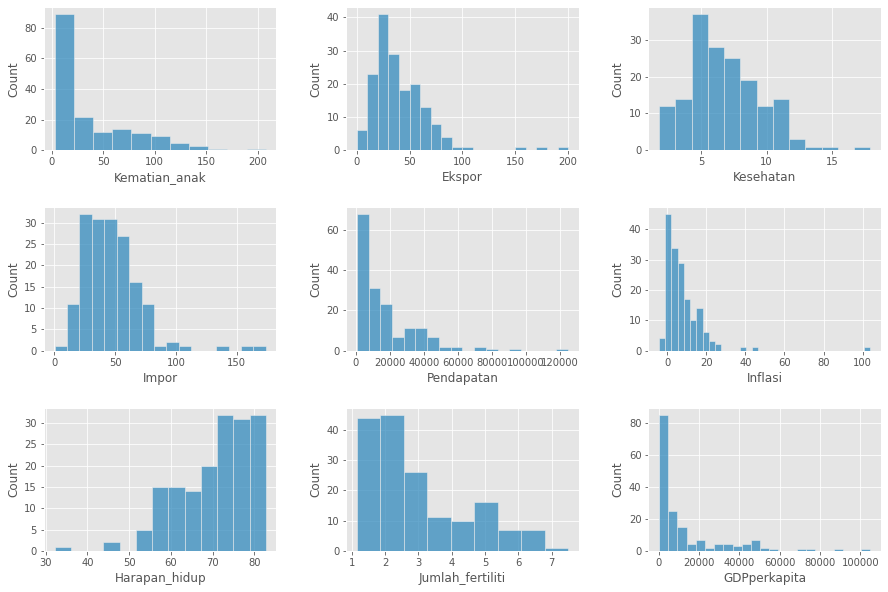

In [8]:
df_uni = df.drop(columns=['Negara'])

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for idx, columns in zip(range(len(df_uni.columns)), df_uni.columns):
    ax = fig.add_subplot(3, 3, idx+1)
    sns.histplot(df[columns])

Bivariate Analysis

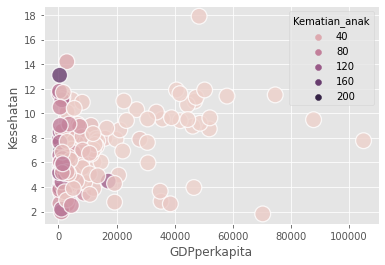

In [9]:
sns.scatterplot(x = 'GDPperkapita', y = 'Kesehatan', hue= 'Kematian_anak',data=df , s= 250, alpha=0.8)

Multivariate Analysis

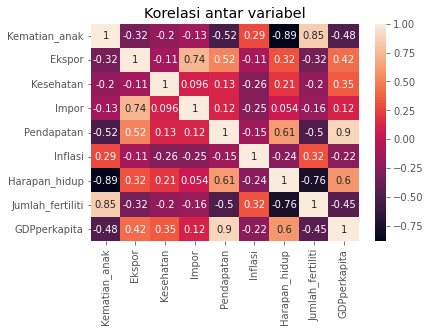

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.title('Korelasi antar variabel')
plt.show()

#Data Preprocessing

##Menghapus kolom yang tidak digunakan

In [11]:
# Drop data yang tidak diperlukan (Tidak memiliki korelasi yang besar terhadap variabel lain (-0.3) - (0,3))
df = df.drop(['Impor','Ekspor','Inflasi'], axis =1 )
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553
1,Albania,16.6,6.55,9930,76.3,1.65,4090
2,Algeria,27.3,4.17,12900,76.5,2.89,4460
3,Angola,119.0,2.85,5900,60.1,6.16,3530
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200
...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310
165,Yemen,56.3,5.18,4480,67.5,4.67,1310


##Outliers Treatment

In [12]:
# Drop upper outliers pada variabel yang memiliki angka kesehatan, harapan hidup, GDPperkapita tinggi karena termasuk negara yang tidak membutuhkan bantuan

def upper_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q3 + 1.5*IQR
    x_drop = df[df[x] > upper_bound]
    df.drop(df[df[x]>upper_bound].index,inplace=True)
    print("upper bound:",upper_bound)
    print("outliers:\n",x_drop['Negara'])

def lower_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    x_drop = df[df[x] < lower]
    df.drop(df[df[x]< lower].index,inplace=True)
    print("upper bound:",lower)
    print("outliers:\n",x_drop['Negara'])

##Remove outliers

In [13]:
upper_outliers('GDPperkapita')

upper bound: 33130.0
outliers:
 7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: Negara, dtype: object


In [14]:
upper_outliers('Kesehatan')

upper bound: 12.409999999999997
outliers:
 101    Micronesia, Fed. Sts.
132             Sierra Leone
Name: Negara, dtype: object


In [15]:
upper_outliers('Harapan_hidup')

upper bound: 94.625
outliers:
 Series([], Name: Negara, dtype: object)


In [16]:
lower_outliers('Kematian_anak')

upper bound: -61.50000000000001
outliers:
 Series([], Name: Negara, dtype: object)


##Data yang sudah siap untuk dilakukan modeling


In [17]:
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553
1,Albania,16.6,6.55,9930,76.3,1.65,4090
2,Algeria,27.3,4.17,12900,76.5,2.89,4460
3,Angola,119.0,2.85,5900,60.1,6.16,3530
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200
...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310
165,Yemen,56.3,5.18,4480,67.5,4.67,1310


#Scaling Data

In [18]:
from sklearn import preprocessing
scaled = preprocessing.StandardScaler().fit_transform(df.drop('Negara', axis=1))
df_scaled = pd.DataFrame(scaled,columns=['Kematian_anak', 'Kesehatan','Pendapatan', 'Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])

##Mencari n_clusters yang paling optimal

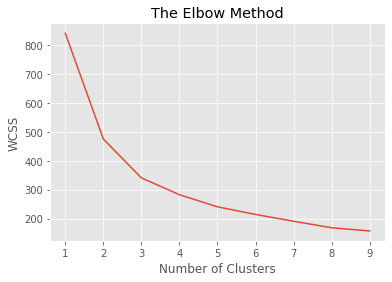

In [19]:
from sklearn.cluster import KMeans
wcss= []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Didapat Number of Clusters = 3

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_
df

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553,1
1,Albania,16.6,6.55,9930,76.3,1.65,4090,0
2,Algeria,27.3,4.17,12900,76.5,2.89,4460,0
3,Angola,119.0,2.85,5900,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,63.0,3.50,2970,0
163,Venezuela,17.1,4.91,16500,75.4,2.47,13500,2
164,Vietnam,23.3,6.84,4490,73.1,1.95,1310,0
165,Yemen,56.3,5.18,4480,67.5,4.67,1310,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


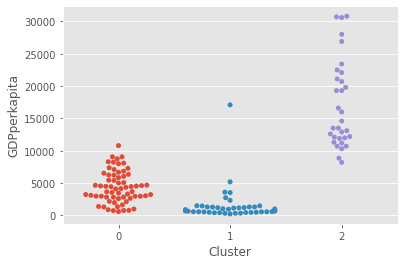

In [21]:
sns.swarmplot(df.Cluster,df.GDPperkapita)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


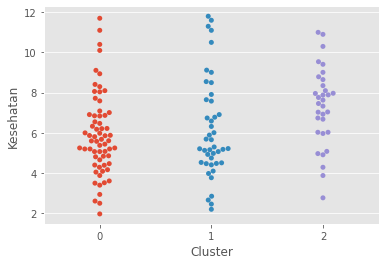

In [28]:
sns.swarmplot(df.Cluster,df.Kesehatan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


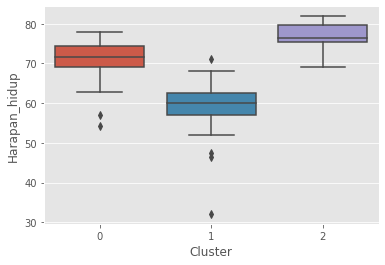

In [29]:
sns.boxplot(df.Cluster,df.Harapan_hidup)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


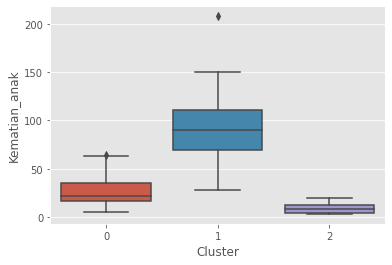

In [30]:
sns.boxplot(df.Cluster,df.Kematian_anak)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


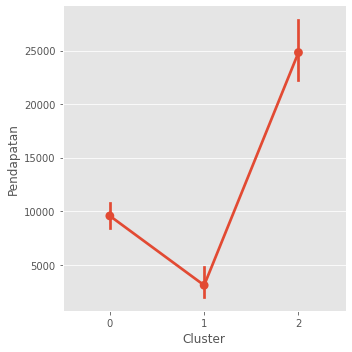

In [27]:
sns.factorplot('Cluster','Pendapatan',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


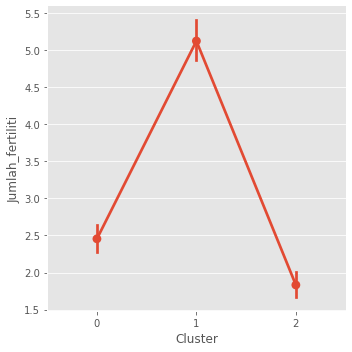

In [32]:
sns.factorplot('Cluster','Jumlah_fertiliti',data=df)

In [43]:
df_final=df[df['Cluster']==1]
df_final.sort_values('Kematian_anak', ascending=False).head()

,Negara,Kematian_anak,Kesehatan,Pendapatan,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,6.91,1500,32.1,3.33,662,1
32,Chad,150.0,4.53,1930,56.5,6.59,897,1
31,Central African Republic,149.0,3.98,888,47.5,5.21,446,1
97,Mali,137.0,4.98,1870,59.5,6.55,708,1
113,Nigeria,130.0,5.07,5150,60.5,5.84,2330,1
